## Exploratory Data Analysis



In [189]:
#imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [190]:
#get the current working directory
cwd = os.getcwd()

order_details = pd.read_csv(cwd+"/pizza_sales_data/order_details.csv")
orders = pd.read_csv(cwd + "/pizza_sales_data/orders.csv")
pizza_type = pd.read_csv(cwd + "/pizza_sales_data/pizza_types.csv",encoding = 'unicode_escape')
pizzas = pd.read_csv(cwd + "/pizza_sales_data/pizzas.csv")
order_pizza = pd.read_csv(cwd + "/pizza_sales_data/fact_order_pizza.csv")

In [191]:
#let's check the order details
order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [193]:
#Let's try to find the sales
order_price = pd.merge(pd.merge(order_details, orders, on='order_id', how='inner'), 
         pizzas, on='pizza_id',how='inner')
order_price

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25
...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,18:58:20,the_greek,XXL,35.95
48616,41183,18139,the_greek_xxl,1,2015-11-05,20:28:52,the_greek,XXL,35.95
48617,42718,18789,the_greek_xxl,1,2015-11-17,11:23:51,the_greek,XXL,35.95
48618,43041,18919,the_greek_xxl,1,2015-11-19,16:58:26,the_greek,XXL,35.95


## What are the best and worst selling pizzas?

<AxesSubplot:ylabel='pizza_id'>

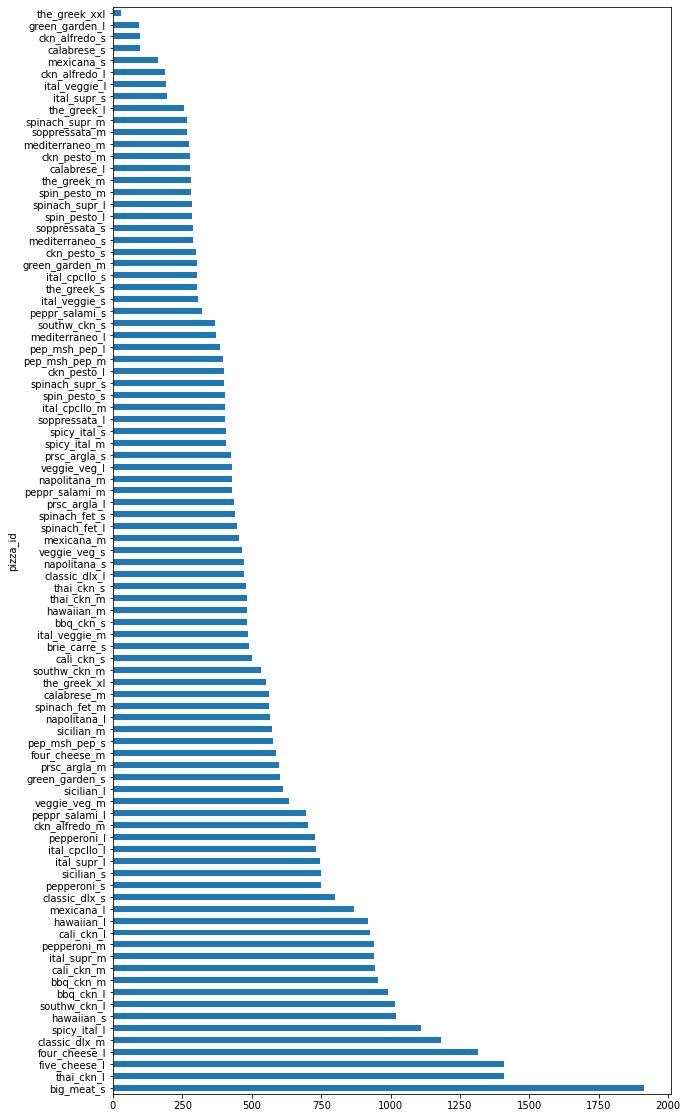

In [216]:
order_details.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).plot(kind="barh", figsize=(10,20))

Clearly Big Meat Pizza is the best selling and The Greek is the worst selling but in different categories of sizes. Thai Chicken is best selling in Large size and Classic deluxe is best selling in medium size pizzas.

#### Best and Worst selling pizzas by size



<AxesSubplot:ylabel='size,pizza_id'>

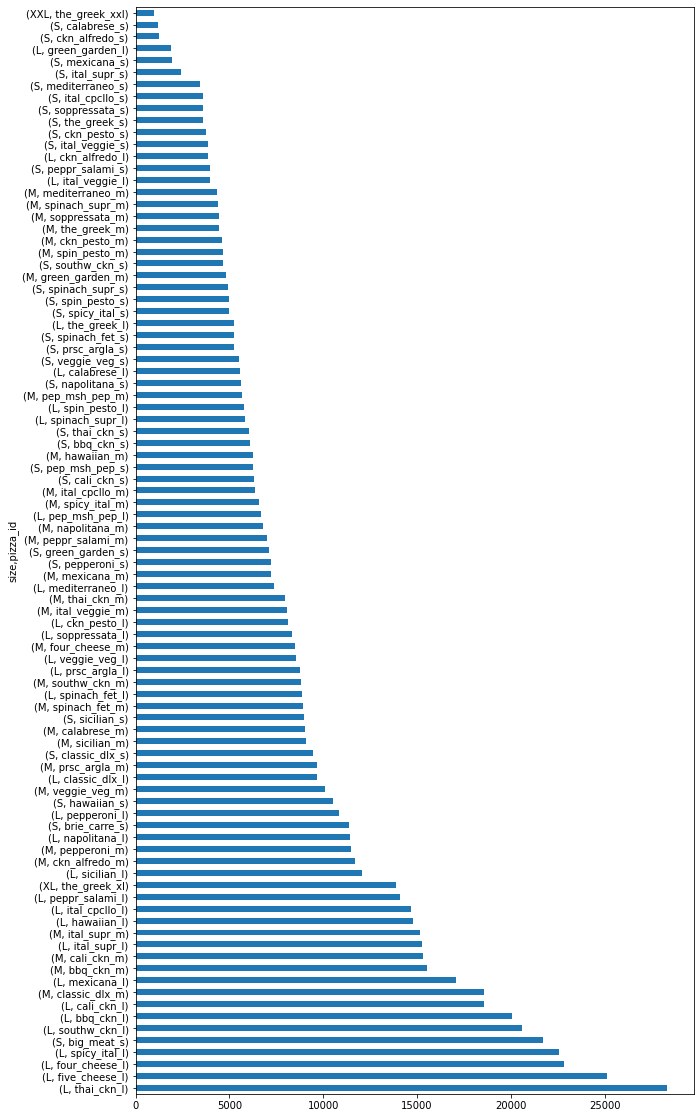

In [223]:
order_price.groupby(['size','pizza_id'])['price'].sum().sort_values(ascending=False).plot(kind="barh", figsize=(10,20))

Thai Chicken pizza is highest selling as well as it generates high revenue. However, clearly, the business needs to focus on The Greek Pizza. It is the least selling pizza as well. 

### Average Order value

In [195]:
#Let's check the average order value
print(f" ${round(order_price['price'].mean(),2)} is the average order value")

 $16.49 is the average order value


### Revenue over months

In [196]:
#Let's convert the object to datetime for date column

order_price['date'] = pd.to_datetime(order_price['date'])

In [197]:
#let's add a column of month to our new dataset
order_price['month'] = order_price['date'].dt.month
order_price['weekday'] = order_price['date'].dt.weekday
order_price['weekday_name'] = order_price['date'].dt.day_name()

In [198]:
order_price.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,month,weekday,weekday_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,1,3,Thursday
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,1,4,Friday
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,1,5,Saturday
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,1,5,Saturday
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,1,6,Sunday


Text(0, 0.5, 'Summed Price for each month')

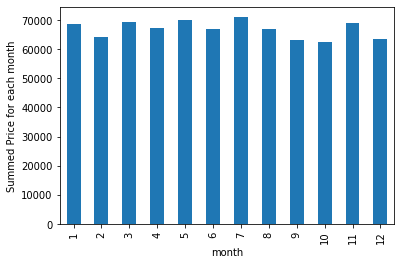

In [199]:
#now groupby month and check the total sales for each month
order_price.groupby('month')['price'].sum().plot(kind='bar')
plt.ylabel("Summed Price for each month")

From the above chart, it appears that month of September and October had the lowest sales, however, the sales are fairly consitent across all month.

In [200]:
#let's check for the month of January which day the sales are high

order_price.groupby('weekday_name')['price'].sum().sort_values(ascending=False)

weekday_name
Friday       133773.90
Thursday     120912.45
Saturday     120865.30
Wednesday    112006.45
Tuesday      111764.70
Monday       105357.15
Sunday        97264.75
Name: price, dtype: float64

This was for the month of january, let's try to find which days are doing better on average.

In [201]:
order_price.groupby('weekday_name')['order_id'].count().sort_values(ascending=False) 

weekday_name
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64

<AxesSubplot:xlabel='time'>

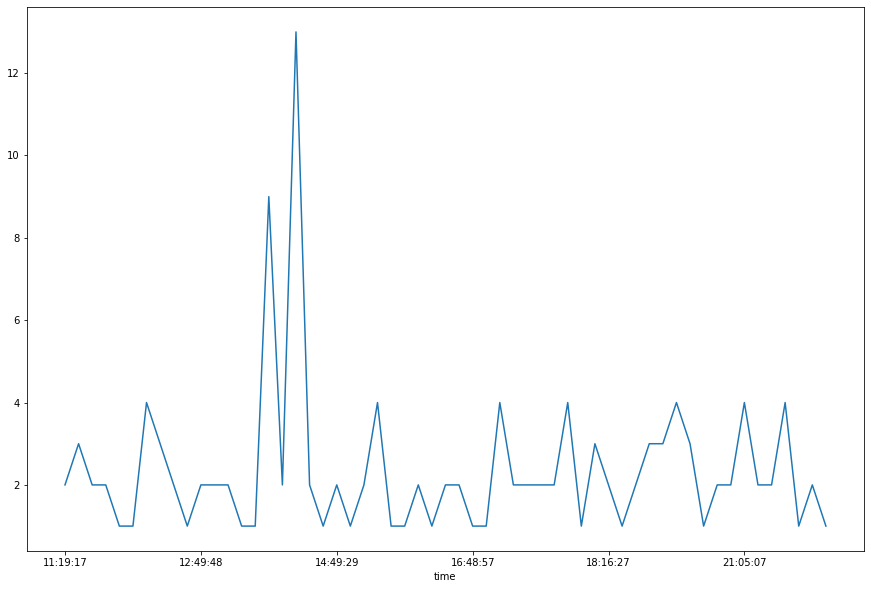

In [273]:
order_price[order_price['date'] == '2015-02-04'].groupby('time')['order_id'].count().plot(figsize=(15,10))